# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.

This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way!

We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

[You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html).

### The Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Data

____
**NOTE**: While working on this exercise, I encountered some challenges due to changes in data availability. The original notebook used data from Google Finance via pandas_datareader, but this source is no longer supported. I attempted to use Yahoo Finance and Stooq as alternatives, but the data retrieved did not match the original dataset, particularly with respect to identifying outliers, which are a key focus in this analysis.

To maintain consistency with the exercises and follow the notebook's guidance on exploring outliers, I've decided to use the dataset provided by the course instead of fetching the data from these sources.

____
We need to get data using pandas datareader.We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

**WARNING**: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK.

**We also provide pickle file in the article lecture right before the video lectures.**

In [2]:
bank_stocks = pd.read_pickle('C:\\Users\\zonca\\Desktop\\Course\\Python\\Projects\\Data Analysis\\Data\\all_banks')

Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers

In [3]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

Check the head of the bank_stocks dataframe.

In [4]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).

What is the max Close price for each bank's stock throughout the time period?

In [5]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [6]:
returns = pd.DataFrame()

We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.

In [7]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()

returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?

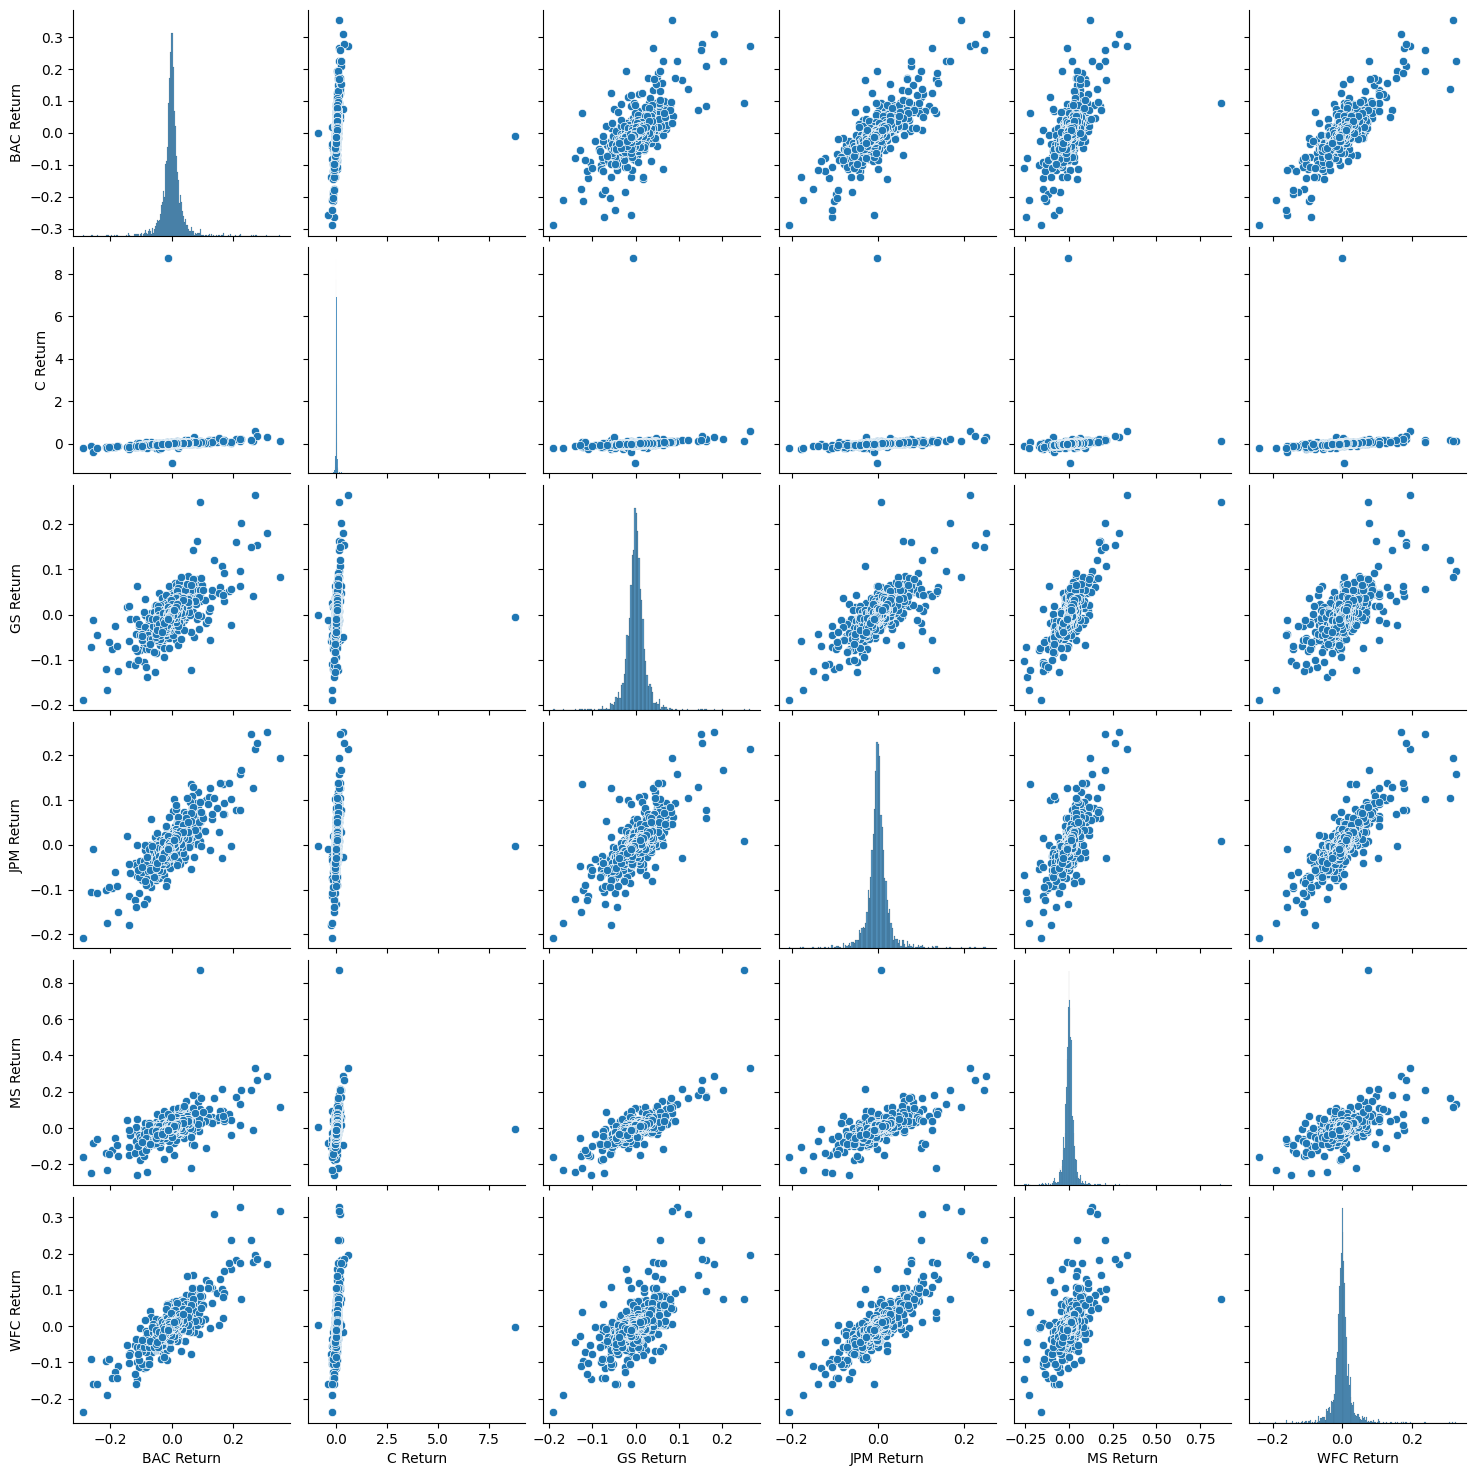

In [8]:
sns.pairplot(returns)

**Answer**: Citigroup stands out, [this](https://en.wikipedia.org/wiki/Citigroup#Collapse_and_US_government_intervention_(2008)) could be the reason

Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?

In [9]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

**Answer**: the 20th January 2009 was [Obama's inauguration day](https://www.theguardian.com/business/2009/jan/20/stock-market-drop-obama-inauguration)

In [10]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anything significant happen in that time frame?

**Answer**: Citigroup had a [stock split](https://www.cnbc.com/2011/05/09/after-citigroup-stock-split-will-large-investors-buy.html)

Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?

In [11]:
returns.std()

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

**Answer**: The riskiest stock over the entire time period is Citigroup

In [12]:
returns.loc['2015-01-01' : '2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

**Answer**: The riskiest stock for the year 2015 is Morgan Stanley

Create a distplot using seaborn of the 2015 returns for Morgan Stanley

<Axes: xlabel='MS Return', ylabel='Count'>

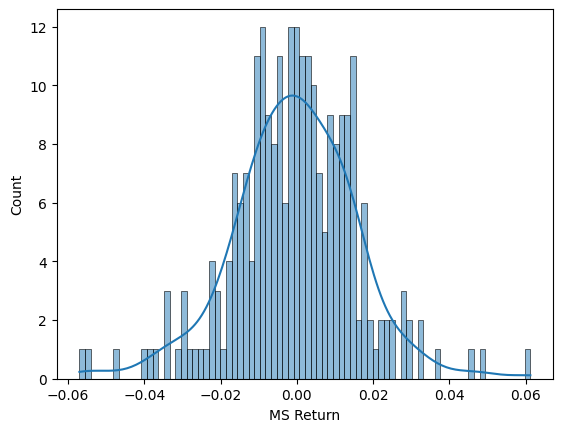

In [13]:
sns.histplot(data=returns.loc['2015-01-01' : '2015-12-31']['MS Return'],
            kde=True,
            bins=80)

Create a distplot using seaborn of the 2008 returns for CitiGroup

<Axes: xlabel='C Return', ylabel='Count'>

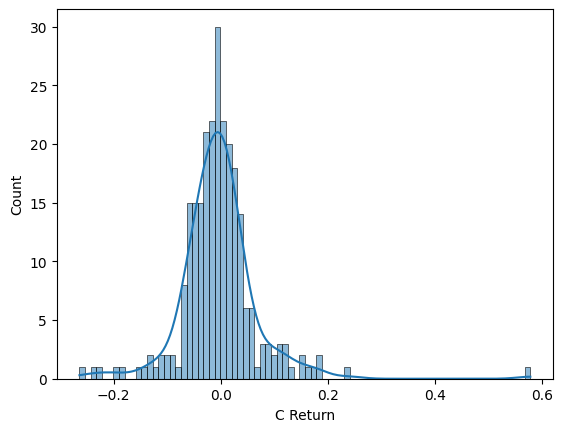

In [14]:
sns.histplot(data=returns.loc['2008-01-01' : '2008-12-31']['C Return'],
            kde=True,
            bins=80)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below.

### Imports

In [15]:
import plotly.graph_objects as go

# Save plotly figures as static images to ensure they display correctly on GitHub.
import plotly.io as pio
from IPython.display import Image, display
image_path = 'C:\\Users\\zonca\\Desktop\\Course\\Python\\Projects\\Data Analysis\\Plots\\'

Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)

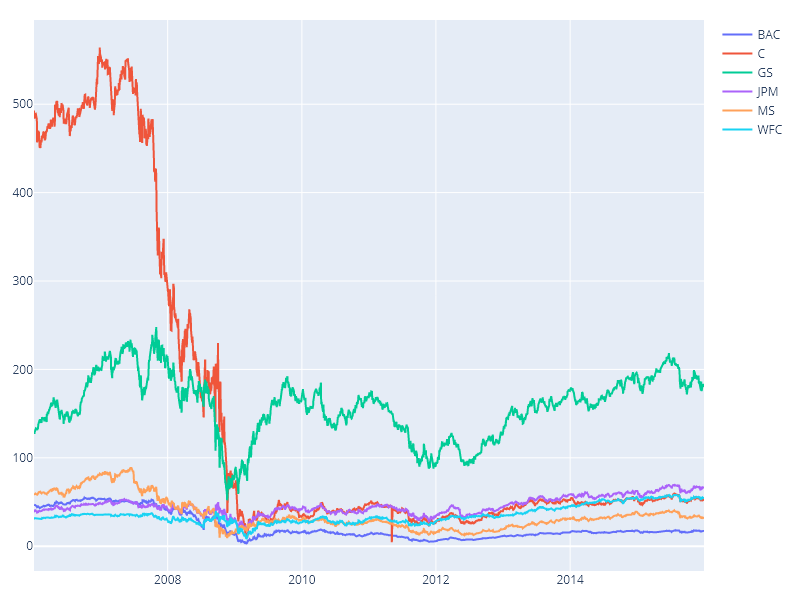

In [16]:
fig = go.Figure()

for tick in tickers:
    fig.add_trace(go.Scatter(x=bank_stocks[tick].index,
                            y=bank_stocks[tick]['Close'],
                            mode='lines',
                            name=tick))

fig.update_layout(margin=dict(l=20, r=20, t=20, b=20),
                hovermode='x unified')

fig.show()

pio.write_image(fig, image_path+'close_price.png', width=800, height=600)
display(Image(filename=image_path+'close_price.png'))

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008

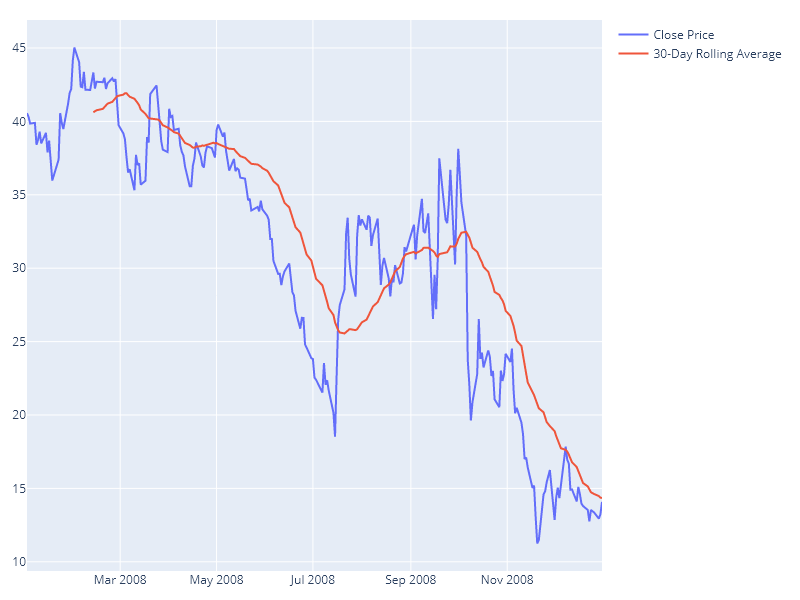

In [17]:
BAC_2008 = bank_stocks.loc['2008-01-01' : '2009-01-01']['BAC']

fig = go.Figure()

fig.add_trace(go.Scatter(x=BAC_2008.index,
                        y=BAC_2008['Close'],
                        mode='lines',
                        name='Close Price'))

fig.add_trace(go.Scatter(x=BAC_2008.index,
                        y=BAC_2008['Close'].rolling(window=30).mean(),
                        mode='lines',
                        name='30-Day Rolling Average'))

fig.update_layout(margin=dict(l=20, r=20, t=20, b=20),
                hovermode='x unified')

fig.show()

pio.write_image(fig, image_path+'30dayavg_BAC_2008.png', width=800, height=600)
display(Image(filename=image_path+'30dayavg_BAC_2008.png'))


Create a heatmap of the correlation between the stocks Close Price.

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

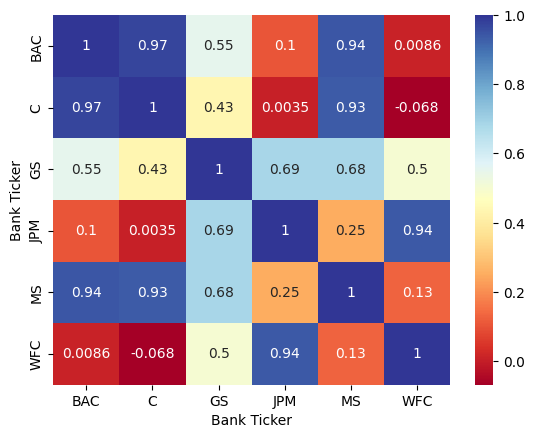

In [18]:
sns.heatmap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(),
            annot=True,
            cmap='RdYlBu')

Optional: Use seaborn's clustermap to cluster the correlations together:

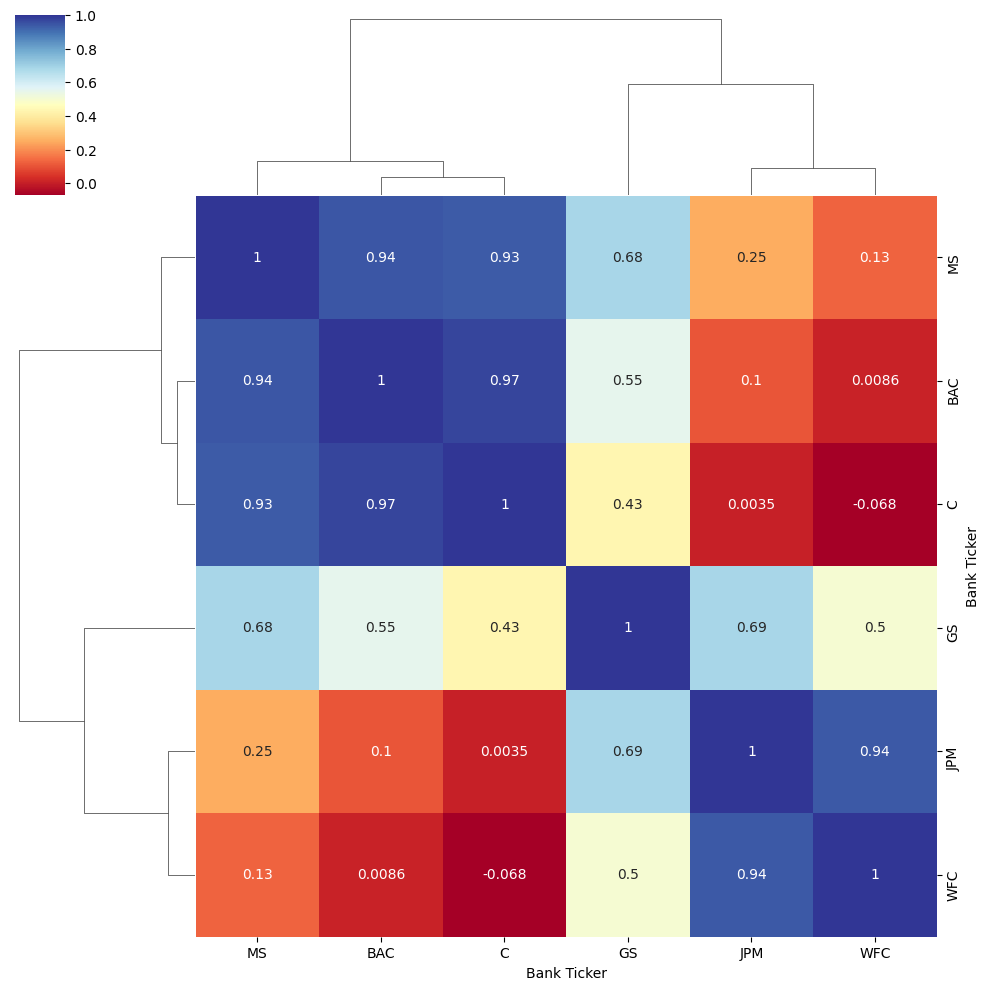

In [19]:
sns.clustermap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(),
            annot=True,
            cmap='RdYlBu')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cufflinks project, so feel free to skip it if any functionality is broken in the future.

____
**NOTE**: Both the iplot and ta_plot methods have been deprecated in the latest versions of Plotly. To continue with this exercise, I have decided to proceed using Plotly instead for visualizing the data.
____

Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.

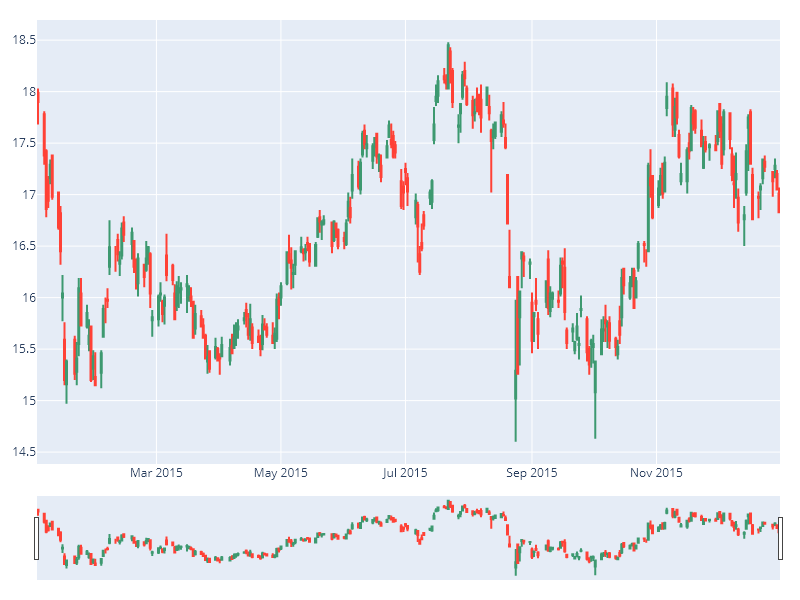

In [20]:
BAC_2015 = bank_stocks.loc['2015-01-01' : '2016-01-01']['BAC']

fig = go.Figure(data=[go.Candlestick(
                x=BAC_2015.index,
                open=BAC_2015['Open'],
                high=BAC_2015['High'],
                low=BAC_2015['Low'],
                close=BAC_2015['Close'])])

fig.update_layout(margin=dict(l=20, r=20, t=20, b=20))

fig.show()

pio.write_image(fig, image_path+'candleplot_BAC_2015.png', width=800, height=600)
display(Image(filename=image_path+'candleplot_BAC_2015.png'))

Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.

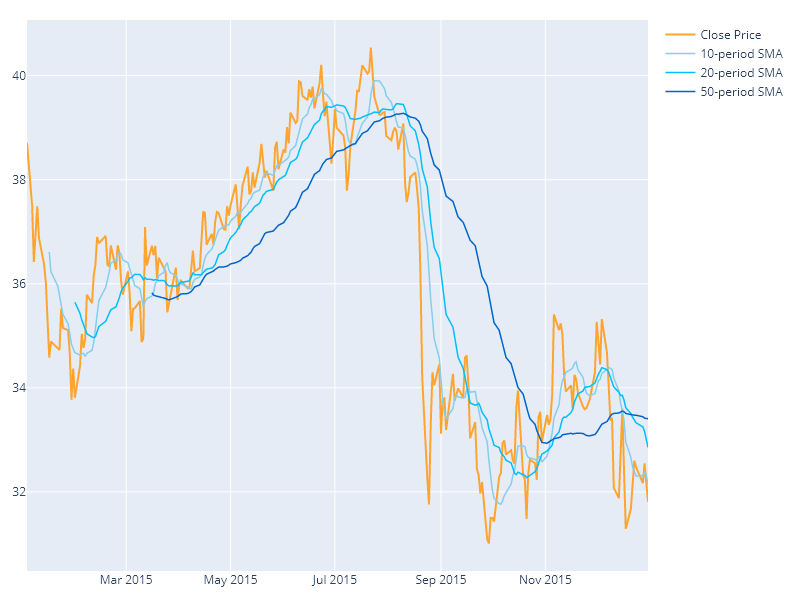

In [21]:
MS_2015 = bank_stocks.loc['2015-01-01' : '2015-12-31']['MS']

fig = go.Figure()

fig.add_trace(go.Scatter(x=MS_2015.index,
                        y=MS_2015['Close'],
                        mode='lines',
                        name='Close Price',
                        line=dict(color='rgb(255,165,47)', width=2)))

fig.add_trace(go.Scatter(x=MS_2015.index,
                        y=MS_2015['Close'].rolling(window=10).mean(),
                        mode='lines',
                        name='10-period SMA',
                        line=dict(color='rgb(135,206,235)', width=1.5)))

fig.add_trace(go.Scatter(x=MS_2015.index,
                        y=MS_2015['Close'].rolling(window=20).mean(),
                        mode='lines',
                        name='20-period SMA',
                        line=dict(color='rgb(0,191,255)', width=1.5)))

fig.add_trace(go.Scatter(x=MS_2015.index,
                        y=MS_2015['Close'].rolling(window=50).mean(),
                        mode='lines',
                        name='50-period SMA',
                        line=dict(color='rgb(0,102,204)', width=1.5)))

fig.update_layout(margin=dict(l=20, r=20, t=20, b=20),
                hovermode='x unified')

fig.show()

pio.write_image(fig, image_path+'sma_MS_2015.png', width=800, height=600)
display(Image(filename=image_path+'sma_MS_2015.png'))

Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.

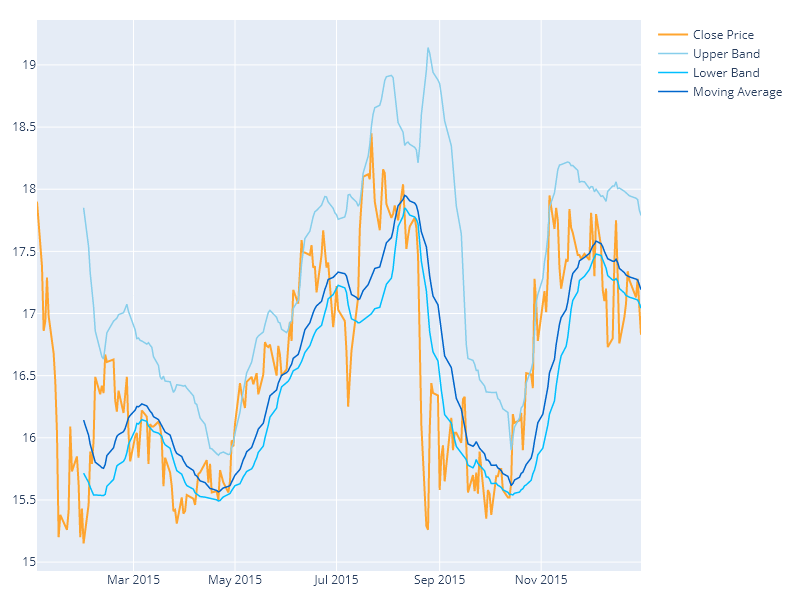

In [22]:
BAC_2015 = bank_stocks.loc['2015-01-01' : '2015-12-31']['BAC']

window = 20
BAC_2015['Moving Average'] = BAC_2015['Close'].rolling(window=window).mean()
# Bollinger Bands
BAC_2015['Upper Band'] = BAC_2015['Moving Average'] + (BAC_2015['Close'].rolling(window=window).std() * 2)
BAC_2015['Lower Band'] = BAC_2015['Moving Average'] - (BAC_2015['Close'].rolling(window=window).std() / 2)

fig = go.Figure()

fig.add_trace(go.Scatter(x=BAC_2015.index,
                        y=BAC_2015['Close'],
                        mode='lines',
                        name='Close Price',
                        line=dict(color='rgb(255,165,47)', width=2)))

fig.add_trace(go.Scatter(x=MS_2015.index,
                        y=BAC_2015['Upper Band'],
                        mode='lines',
                        name='Upper Band',
                        line=dict(color='rgb(135,206,235)', width=1.5)))

fig.add_trace(go.Scatter(x=MS_2015.index,
                        y=BAC_2015['Lower Band'],
                        mode='lines',
                        name='Lower Band',
                        line=dict(color='rgb(0,191,255)', width=1.5)))

fig.add_trace(go.Scatter(x=MS_2015.index,
                        y=BAC_2015['Moving Average'],
                        mode='lines',
                        name='Moving Average',
                        line=dict(color='rgb(0,102,204)', width=1.5)))

fig.update_layout(margin=dict(l=20, r=20, t=20, b=20),
                hovermode='x unified')

fig.show()

pio.write_image(fig, image_path+'bollinger_BAC_2015.png', width=800, height=600)
display(Image(filename=image_path+'bollinger_BAC_2015.png'))